<!-- 1. Viết chương trình tạo menu cho người dùng chọn các phương pháp biển đổi ảnh :
Image inverse transformation
Gamma Correction
Log transformation
Histogram equaliztion
Constrast Stretching  -->


MENU:
I - Image Inverse Transformation
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
Q - Quit

Lựa chọn không hợp lệ.
Lựa chọn không hợp lệ.
Lựa chọn không hợp lệ.


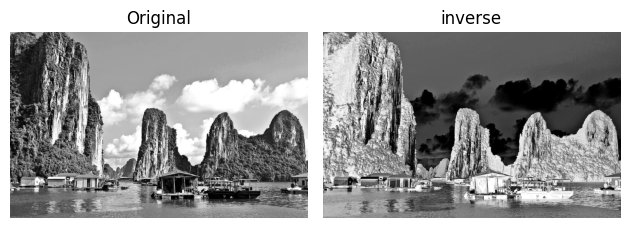

Đã lưu ảnh: output\ha-long-bay-in-vietnam_inverse.jpg


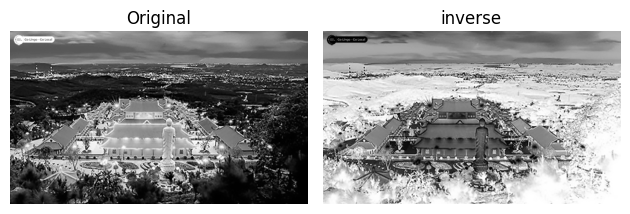

Đã lưu ảnh: output\pagoda_inverse.jpg


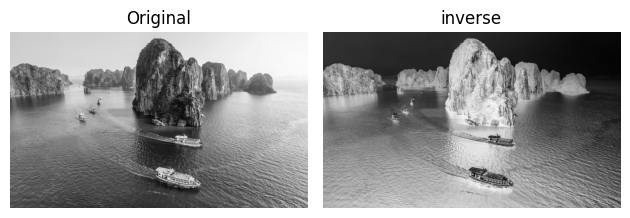

Đã lưu ảnh: output\quang_ninh_inverse.jpg
Thoát chương trình.


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Tạo thư mục lưu kết quả nếu chưa có
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Các hàm biến đổi ảnh
def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_norm = img / 255.0
    corrected = np.power(img_norm, gamma)
    return np.uint8(corrected * 255)

def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * np.log(1 + img.astype(np.float32))
    return np.uint8(log_img)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = (img - a) * 255 / (b - a)
    return np.uint8(stretched)

# Hàm hiển thị ảnh gốc và ảnh kết quả
def show_image_pair(original, transformed, title):
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Hiện menu
print("""
MENU:
I - Image Inverse Transformation
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
Q - Quit
""")

# Nhận lựa chọn từ người dùng
while True:
    choice = input("Nhập lựa chọn (I/G/L/H/C hoặc Q để thoát): ").strip().upper()

    if choice == 'Q':
        print("Thoát chương trình.")
        break

    # Tìm và xử lý các ảnh .jpg trong thư mục exercise
    for filename in os.listdir("exercise"):
        if filename.lower().endswith(".jpg"):
            img_path = os.path.join("exercise", filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Lỗi đọc ảnh: {filename}")
                continue

            # Áp dụng biến đổi theo lựa chọn
            if choice == 'I':
                result = inverse_image(img)
                method = "inverse"
            elif choice == 'G':
                gamma = float(input("Nhập giá trị gamma (ví dụ: 0.5, 2.0): "))
                result = gamma_correction(img, gamma)
                method = f"gamma_{gamma}"
            elif choice == 'L':
                result = log_transformation(img)
                method = "log"
            elif choice == 'H':
                result = histogram_equalization(img)
                method = "histeq"
            elif choice == 'C':
                result = contrast_stretching(img)
                method = "contrast"
            else:
                print("Lựa chọn không hợp lệ.")
                continue

            # Hiển thị
            show_image_pair(img, result, method)

            # Lưu kết quả
            save_name = f"{os.path.splitext(filename)[0]}_{method}.jpg"
            save_path = os.path.join(output_dir, save_name)
            cv2.imwrite(save_path, result)
            print(f"Đã lưu ảnh: {save_path}")


<!-- 2. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh:
Fast Fourier
Butterworth Lowpass Filter
Butterworth Highpass Filter
Khi nhấn phím F,L,H thì thực hiện các hàm tương ứng cho các hình Exercise. -->


MENU:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Quit



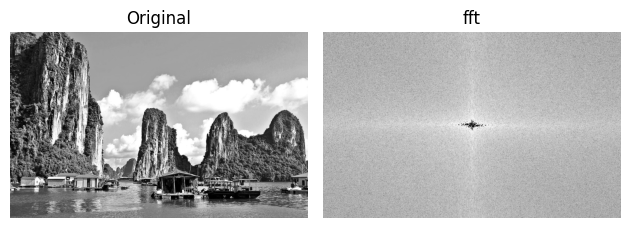

Đã lưu ảnh: exercise_keke/ha-long-bay-in-vietnam_fft.jpg


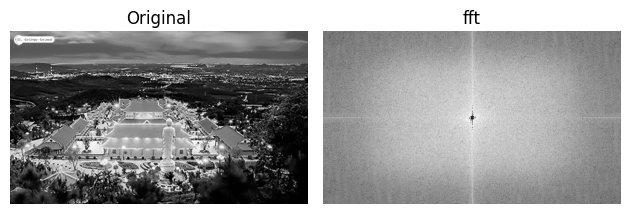

Đã lưu ảnh: exercise_keke/pagoda_fft.jpg


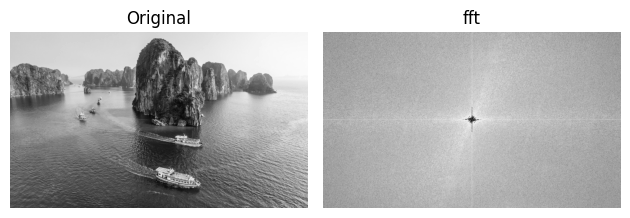

Đã lưu ảnh: exercise_keke/quang_ninh_fft.jpg


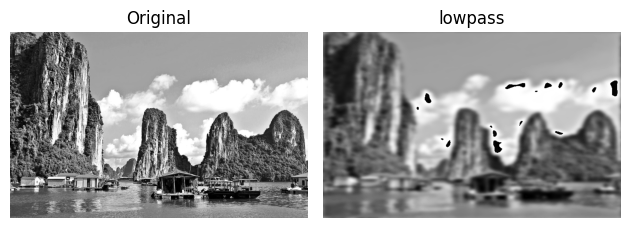

Đã lưu ảnh: exercise_keke/ha-long-bay-in-vietnam_lowpass.jpg


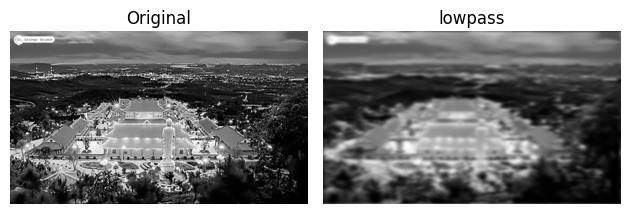

Đã lưu ảnh: exercise_keke/pagoda_lowpass.jpg


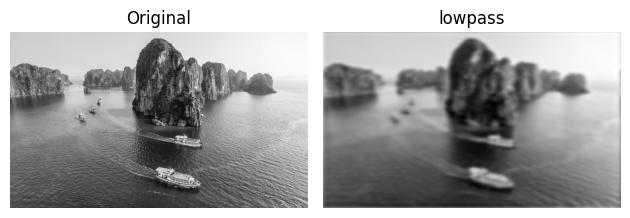

Đã lưu ảnh: exercise_keke/quang_ninh_lowpass.jpg


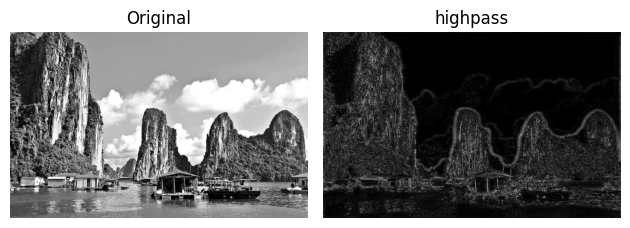

Đã lưu ảnh: exercise_keke/ha-long-bay-in-vietnam_highpass.jpg


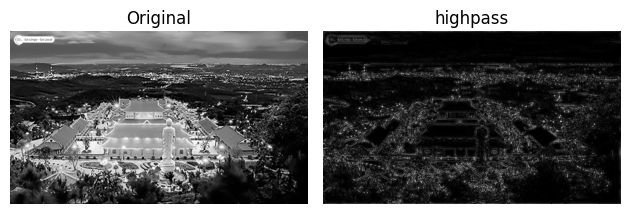

Đã lưu ảnh: exercise_keke/pagoda_highpass.jpg


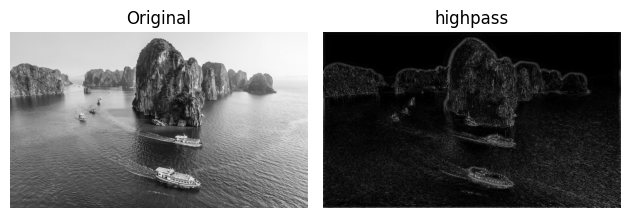

Đã lưu ảnh: exercise_keke/quang_ninh_highpass.jpg
Thoát chương trình.


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

output_dir = "exercise_keke"
os.makedirs(output_dir, exist_ok=True)

# Hàm thực hiện FFT và hiển thị phổ
def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude)

# Butterworth Lowpass Filter
def butterworth_lowpass(img, D0=30, n=2):
    rows, cols = img.shape
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - rows//2, v - cols//2, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / D0)**(2*n))

    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    G = H * Fshift
    result = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(result)
    return np.uint8(np.abs(img_back))

# Butterworth Highpass Filter
def butterworth_highpass(img, D0=30, n=2):
    rows, cols = img.shape
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - rows//2, v - cols//2, indexing='ij')
    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D0 / (D + 1e-5))**(2*n)) 

    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    G = H * Fshift
    result = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(result)
    return np.uint8(np.abs(img_back))

# Hiển thị menu
print("""
MENU:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Quit
""")

# Nhận lựa chọn từ người dùng
while True:
    key = input("Nhập lựa chọn (F/L/H hoặc Q để thoát): ").strip().upper()

    if key == 'Q':
        print("Thoát chương trình.")
        break

    for filename in os.listdir("exercise"):
        if filename.lower().endswith(".jpg"):
            path = os.path.join("exercise", filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Lỗi đọc ảnh {filename}")
                continue

            if key == 'F':
                result = fast_fourier(img)
                method = "fft"
            elif key == 'L':
                result = butterworth_lowpass(img)
                method = "lowpass"
            elif key == 'H':
                result = butterworth_highpass(img)
                method = "highpass"
            else:
                print("Lựa chọn không hợp lệ.")
                break

            # Hiển thị và lưu kết quả
            show_image_pair(img, result, method)
            save_name = f"{os.path.splitext(filename)[0]}_{method}.jpg"
            cv2.imwrite(os.path.join("exercise_keke", save_name), result)
            print(f"Đã lưu ảnh: exercise_keke/{save_name}")

<!-- 3. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục Exercise và sử dụng ngẫu nhiên 1 phép biển đổi
ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi -->


MENU:
I - Image Inverse Transformation
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
Q - Quit



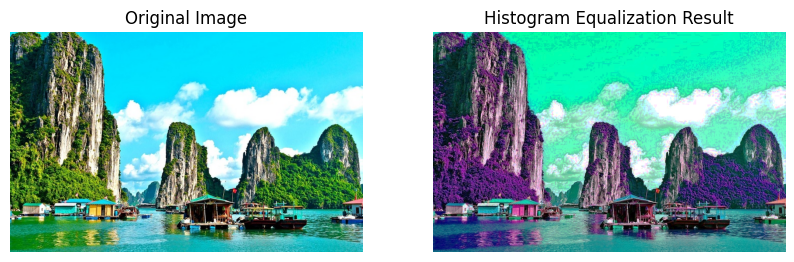

Đã lưu ảnh: exercise_trans_3/ha-long-bay-in-vietnam_transformed_Histogram Equalization.jpg


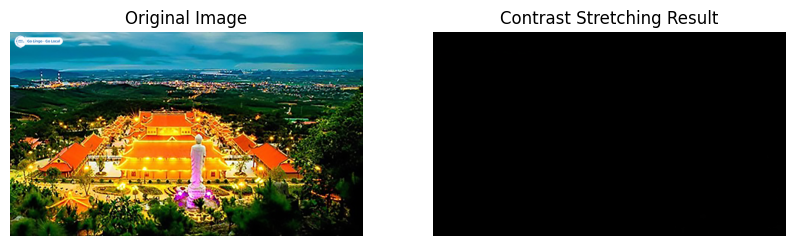

Đã lưu ảnh: exercise_trans_3/pagoda_transformed_Contrast Stretching.jpg


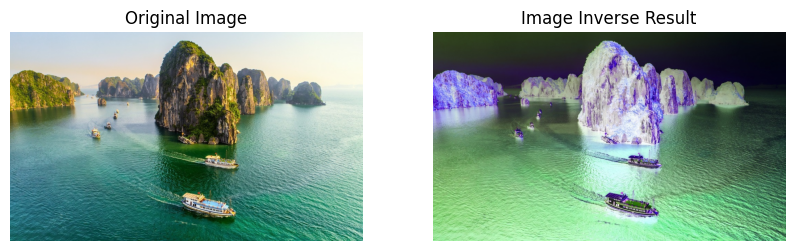

Đã lưu ảnh: exercise_trans_3/quang_ninh_transformed_Image Inverse.jpg
Thoát chương trình.


In [1]:
#bt3

import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

output_dir = "exercise_trans_3"
os.makedirs(output_dir, exist_ok=True)

# Hàm thực hiện Image Inverse Transformation
def image_inverse(img):
    return 255 - img

# Hàm thực hiện Gamma Correction
def gamma_correction(img, gamma=0.5):
    img_float = img.astype(float)
    return np.clip(255 * (img_float / 255) ** gamma, 0, 255).astype(np.uint8)

# Hàm thực hiện Log Transformation
def log_transformation(img):
    img_float = img.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    return np.clip(c * np.log(1 + img_float), 0, 255).astype(np.uint8)

# Hàm thực hiện Histogram Equalization
def histogram_equalization(img):
    img_flatten = img.flatten()
    hist, bins = np.histogram(img_flatten, 256, [0, 255])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    img_equalized = np.interp(img_flatten, bins[:-1], cdf_normalized)
    return img_equalized.reshape(img.shape).astype(np.uint8)

# Hàm thực hiện Contrast Stretching
def contrast_stretching(img):
    min_pixel = np.min(img)
    max_pixel = np.max(img)
    return np.clip(255 * (img - min_pixel) / (max_pixel - min_pixel), 0, 255).astype(np.uint8)

# Hàm thay đổi thứ tự màu RGB
def change_rgb_order(img):
    # Đảo thứ tự các kênh màu RGB
    r, g, b = cv2.split(img)
    order = random.choice([(r, g, b), (r, b, g), (g, r, b), (g, b, r), (b, r, g), (b, g, r)])
    return cv2.merge(order)

# Hàm hiển thị ảnh gốc và ảnh kết quả
def show_image_pair(original, result, method):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"{method} Result")
    plt.axis('off')
    plt.show()

# Các phép biến đổi ảnh
transformations = [image_inverse, gamma_correction, log_transformation, histogram_equalization, contrast_stretching]

# Hiển thị menu
print("""
MENU:
I - Image Inverse Transformation
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
Q - Quit
""")

# Nhận lựa chọn từ người dùng
while True:
    key = input("Nhập lựa chọn (I/G/L/H/C hoặc Q để thoát): ").strip().upper()

    if key == 'Q':
        print("Thoát chương trình.")
        break

    # Duyệt qua các ảnh trong thư mục "exercise"
    for filename in os.listdir("exercise"):
        if filename.lower().endswith(".jpg"):  # Kiểm tra định dạng ảnh
            path = os.path.join("exercise", filename)
            img = cv2.imread(path)

            if img is None:
                print(f"Lỗi đọc ảnh {filename}")
                continue

            # Thay đổi thứ tự màu RGB
            img_changed = change_rgb_order(img)

            # Chọn ngẫu nhiên một phương pháp biến đổi ảnh từ câu 1
            transformation = random.choice(transformations)

            # Áp dụng phương pháp biến đổi ảnh
            result = transformation(img_changed)
            method = transformation.__name__.replace("_", " ").title()  # Lấy tên phương pháp

            # Hiển thị và lưu kết quả
            show_image_pair(img, result, method)
            save_name = f"{os.path.splitext(filename)[0]}_transformed_{method}.jpg"
            cv2.imwrite(os.path.join(output_dir, save_name), result)
            print(f"Đã lưu ảnh: {output_dir}/{save_name}")

<!-- 4.  -->


MENU:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Quit



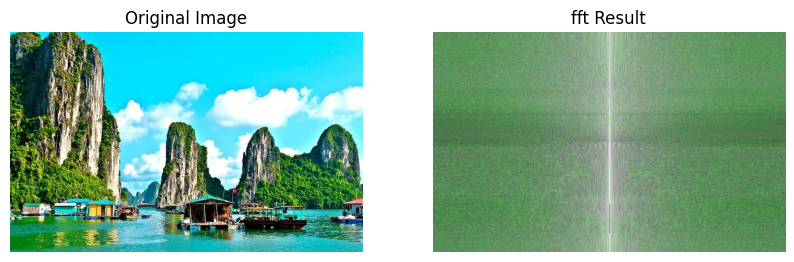

Đã lưu ảnh: exercise_trans_4/ha-long-bay-in-vietnam_fft.jpg


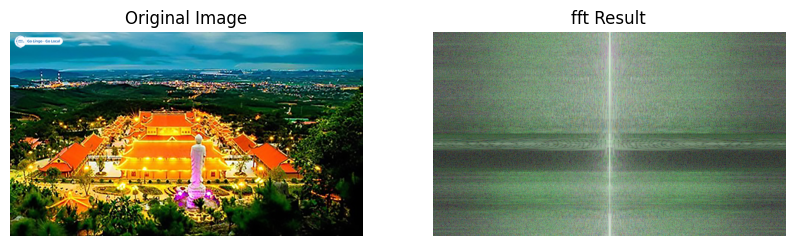

Đã lưu ảnh: exercise_trans_4/pagoda_fft.jpg


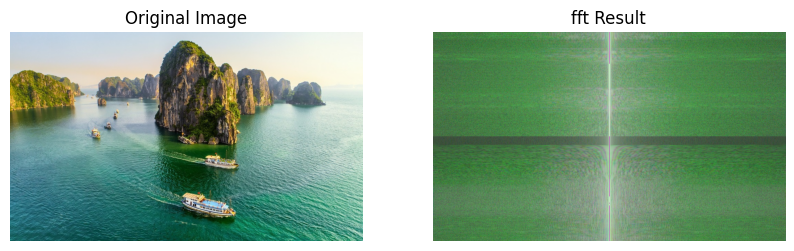

Đã lưu ảnh: exercise_trans_4/quang_ninh_fft.jpg
Thoát chương trình.


In [2]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import minimum_filter, maximum_filter

output_dir = "exercise_trans_4"
os.makedirs(output_dir, exist_ok=True)

# Hàm thực hiện Fast Fourier Transform (FFT)
def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude)

# Hàm thực hiện Butterworth Lowpass Filter
def butterworth_lowpass(img, D0=30, n=2):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Chuyển ảnh RGB sang Grayscale
    rows, cols = img_gray.shape
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - rows//2, v - cols//2)  # Tạo lưới cho các tần số u, v
    D = np.sqrt(u**2 + v**2)  # Tính khoảng cách Euclide
    H = 1 / (1 + (D / D0)**(2*n))  # Tạo bộ lọc Butterworth Lowpass

    F = np.fft.fft2(img_gray)  # Biến đổi Fourier ảnh
    Fshift = np.fft.fftshift(F)  # Dịch tần số về giữa
    H_resized = np.resize(H, Fshift.shape)  # Sửa kích thước của H để phù hợp với Fshift
    G = H_resized * Fshift  # Áp dụng bộ lọc vào tần số ảnh
    result = np.fft.ifftshift(G)  # Dịch ngược tần số về vị trí ban đầu
    img_back = np.fft.ifft2(result)  # Biến đổi ngược Fourier
    return np.uint8(np.abs(img_back))

# Hàm thực hiện Butterworth Highpass Filter
def butterworth_highpass(img, D0=30, n=2):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Chuyển ảnh RGB sang Grayscale
    rows, cols = img_gray.shape
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - rows//2, v - cols//2)  # Tạo lưới cho các tần số u, v
    D = np.sqrt(u**2 + v**2)  # Tính khoảng cách Euclide
    H = 1 / (1 + (D0 / (D + 1e-5))**(2*n))  # Tạo bộ lọc Butterworth Highpass

    F = np.fft.fft2(img_gray)  # Biến đổi Fourier ảnh
    Fshift = np.fft.fftshift(F)  # Dịch tần số về giữa
    H_resized = np.resize(H, Fshift.shape)  # Sửa kích thước của H để phù hợp với Fshift
    G = H_resized * Fshift  # Áp dụng bộ lọc vào tần số ảnh
    result = np.fft.ifftshift(G)  # Dịch ngược tần số về vị trí ban đầu
    img_back = np.fft.ifft2(result)  # Biến đổi ngược Fourier
    return np.uint8(np.abs(img_back))

# Hàm thay đổi thứ tự màu RGB
def change_rgb_order(img):
    # Đảo thứ tự các kênh màu RGB
    r, g, b = cv2.split(img)
    order = random.choice([(r, g, b), (r, b, g), (g, r, b), (g, b, r), (b, r, g), (b, g, r)])
    return cv2.merge(order)

# Hàm áp dụng Min Filter
def apply_min_filter(img):
    return minimum_filter(img, size=3)

# Hàm áp dụng Max Filter
def apply_max_filter(img):
    return maximum_filter(img, size=3)

# Hàm hiển thị ảnh gốc và ảnh kết quả
def show_image_pair(original, result, method):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"{method} Result")
    plt.axis('off')
    plt.show()

# Danh sách các phép biến đổi ảnh
transformations = [fast_fourier, butterworth_lowpass, butterworth_highpass]

# Hiển thị menu
print("""
MENU:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
Q - Quit
""")

# Nhận lựa chọn từ người dùng
while True:
    key = input("Nhập lựa chọn (F/L/H hoặc Q để thoát): ").strip().upper()

    if key == 'Q':
        print("Thoát chương trình.")
        break

    # Duyệt qua các ảnh trong thư mục "exercise"
    for filename in os.listdir("exercise"):
        if filename.lower().endswith(".jpg"):  # Kiểm tra định dạng ảnh
            path = os.path.join("exercise", filename)
            img = cv2.imread(path)

            if img is None:
                print(f"Lỗi đọc ảnh {filename}")
                continue

            # Thay đổi thứ tự màu RGB
            img_changed = change_rgb_order(img)

            # Chọn ngẫu nhiên một phương pháp biến đổi ảnh từ câu 2
            if key == 'F':
                result = fast_fourier(img_changed)
                method = "fft"
            elif key == 'L':
                result = butterworth_lowpass(img_changed)
                result = apply_min_filter(result)  # Áp dụng Min Filter cho Lowpass
                method = "Lowpass + Min Filter"
            elif key == 'H':
                result = butterworth_highpass(img_changed)
                result = apply_max_filter(result)  # Áp dụng Max Filter cho Highpass
                method = "Highpass + Max Filter"
            else:
                print("Lựa chọn không hợp lệ.")
                break

            # Hiển thị và lưu kết quả
            show_image_pair(img, result, method)
            save_name = f"{os.path.splitext(filename)[0]}_{method}.jpg"
            cv2.imwrite(os.path.join(output_dir, save_name), result)
            print(f"Đã lưu ảnh: {output_dir}/{save_name}")